In [1]:
# Import Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import pre-wrangled dataset (2_data_wrangling.csv) into a dataframe
df = pd.read_csv('2_data_wrangling.csv')
print("Dataset Loaded and ready for creating visualizations")

Dataset Loaded and ready for creating visualizations


In [3]:
# Print first 5 rows of dataset to check successful loading
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04T18:45:00.000Z,Falcon 9,NaN,LEO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,7,2010-12-08T15:43:00.000Z,Falcon 9,NaN,LEO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1,0,B0004,-80.577366,28.561857,0
2,8,2012-05-22T07:44:00.000Z,Falcon 9,525.0,LEO,CCSFS SLC 40,NaN,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
3,9,2012-10-08T00:35:00.000Z,Falcon 9,400.0,ISS,CCSFS SLC 40,NaN,1,False,False,False,NaN,1,0,B0006,-80.577366,28.561857,0
4,10,2013-03-01T19:10:00.000Z,Falcon 9,677.0,ISS,CCSFS SLC 40,NaN,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0


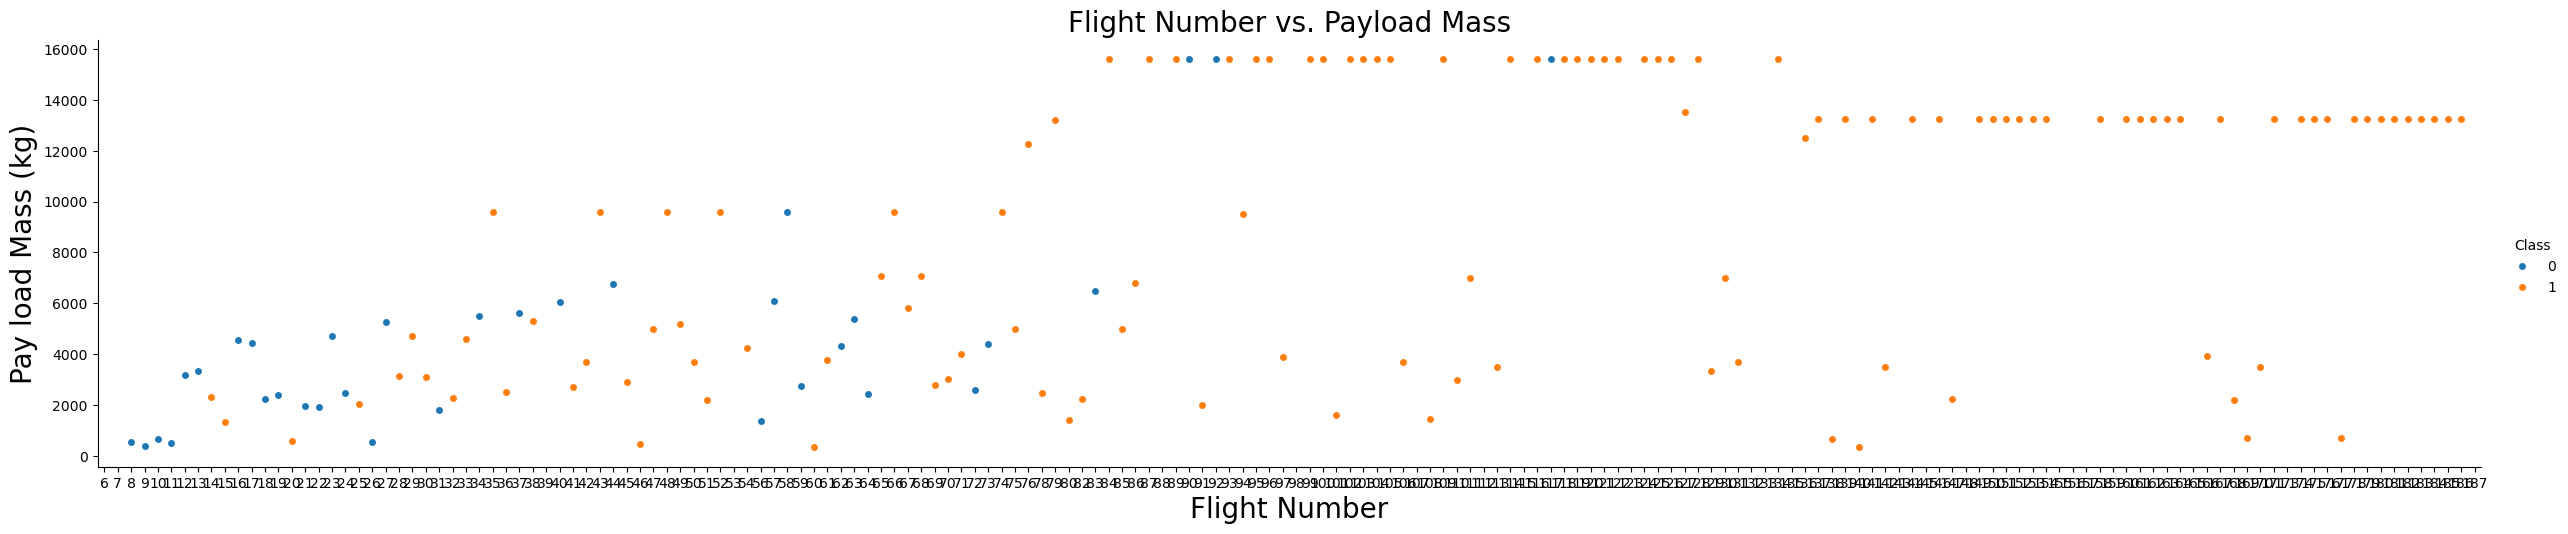

In [4]:
# 1. Create chart showing Flight Number vs Payload Mass (Did they increase after more successful launches?)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.title("Flight Number vs. Payload Mass", fontsize=20)

plt.show()

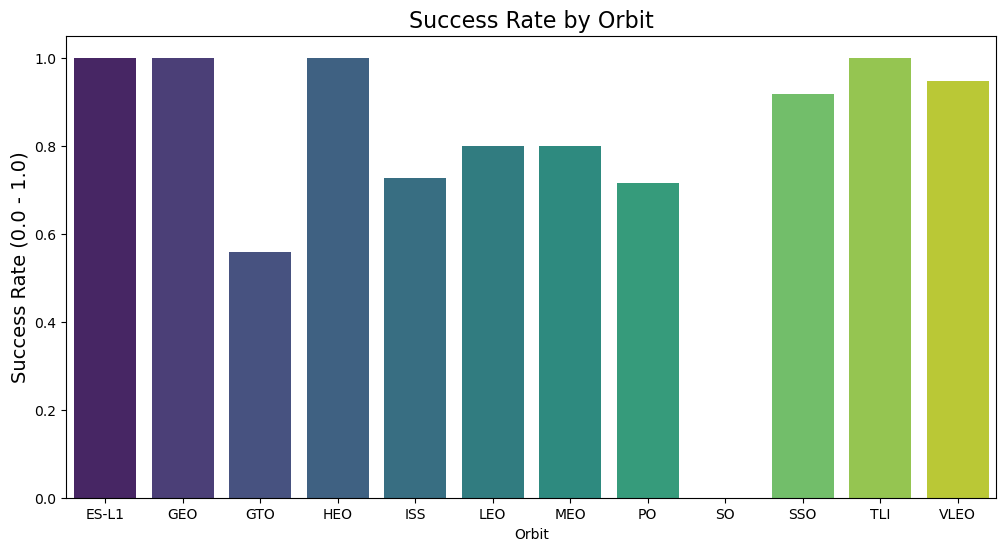

In [7]:
# 2. Bar Chart: Success Rate by Orbit Type
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Orbit", y="Class", data=orbit_success, hue="Orbit", palette="viridis", legend=False)
plt.title("Success Rate by Orbit", fontsize=16)
plt.ylabel("Success Rate (0.0 - 1.0)", fontsize=14)
plt.show()

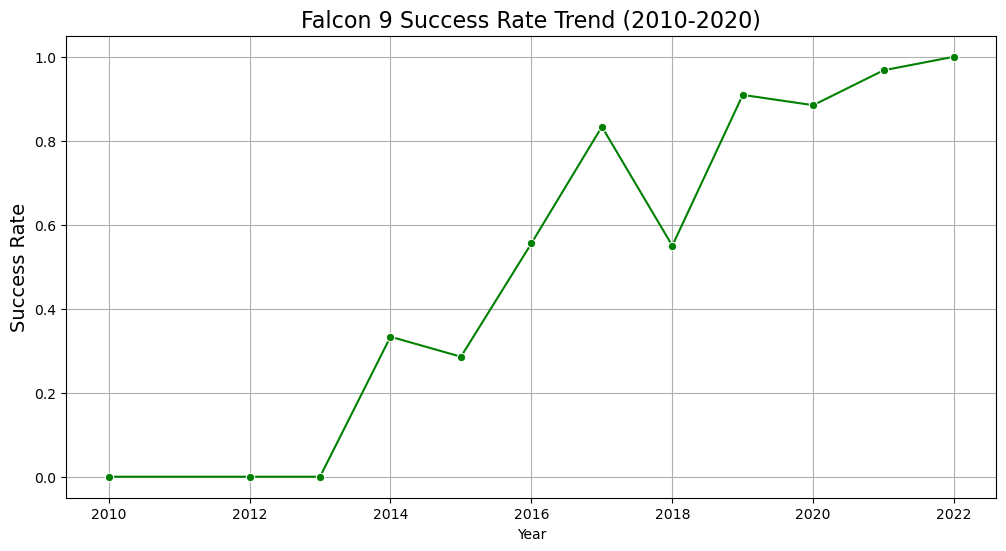

In [8]:
# 3. Visualisation of Falcon 9 Success Rate as years progress between 2010 - 2020.

df['Year'] = pd.DatetimeIndex(df['Date']).year

# Calculate average success per year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Class", data=yearly_success, marker='o', color='green')

plt.title("Falcon 9 Success Rate Trend (2010-2020)", fontsize=16)
plt.ylabel("Success Rate", fontsize=14)
plt.grid(True)

plt.show()

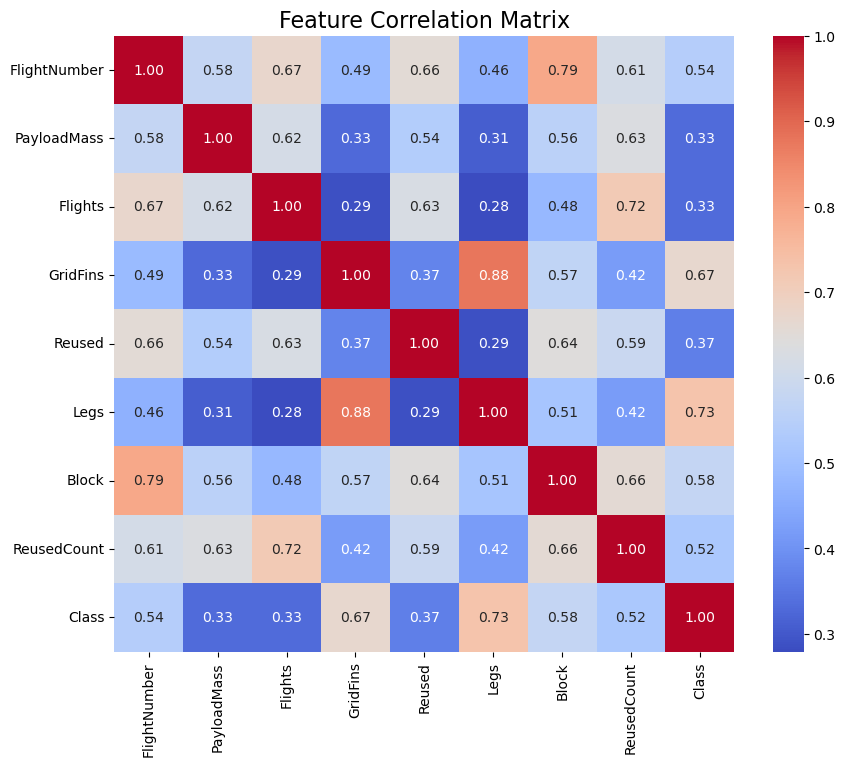

In [9]:
# 4. Visulisation Heatmap - Correlation Matrix

# Select numeric columns available in the dataset for correlation
numeric_df = df[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Class']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix", fontsize=16)

plt.show()

In [ ]:
# End Session
print("Visualization Analysis Complete. Ready for Machine Learning.")

## Conclusions & Insights

Based on the visualizations above, we can draw the following conclusions for our Machine Learning model:

1.  **Trend over Time:** The Line Chart shows a clear upward trend in success rates. Early Falcon 9 flights struggled, but reliability has stabilized at a high level in recent years. This means **Flight Number** (or Date) will be a strong predictive feature.
2.  **Orbit Difficulty:** The Bar Chart proves that not all missions are equal. **ES-L1, GEO, and HEO** orbits have high success rates, while **SO** (Sun-Synchronous Orbit) has a 0% success rate in this dataset. The **Orbit** feature is critical for prediction.
3.  **Payload Factor:** The Scatter Plot suggests that while heavier payloads are challenging, they are not a guaranteed failure point. Modern Falcon 9s land heavy payloads regularly.
4.  **Correlations:** The Heatmap confirms that **GridFins** and **Legs** are highly correlated with Success (`Class`). This makes sense: a rocket without landing legs isn't trying tofeatures.these 